## Read and plot audio file with Python

Install packages and download an audio file example.

In [ ]:
!pip install matplotlib
!pip install soundfile
!wget http://sabiod.lis-lab.fr/pub/challenges/Biosonar/audio_example.wav

There are many libraries to read audios file with Python. In this example, we present [Soundfile](https://pysoundfile.readthedocs.io/en/latest/) library.

In [1]:
import soundfile as sf
sig, sr = sf.read("audio_example.wav")
print("Signal size : %s"%sig.shape)
print("Sample rate: %s"%sr)


Signal size : 51200
Sample rate: 256000


The function takes the audio filename (path and name) in parameter and return 2 values: 
- The audio signal, if the file is in mono (one channel), the signal will be a vector with a dimension {number_of_sample} = {signal_duration} * {sampling_rate}. If the file is in stereo (two channels), the signal will be a matrix 2D [{number_of_sample},{number_of_channel}].
- Sampling rate

In this challenge, only mono files will be used. 
If needed, you can read only one part of the audio signal with arguments: "start" et "stop" in sf.read function.

To plot the signal :

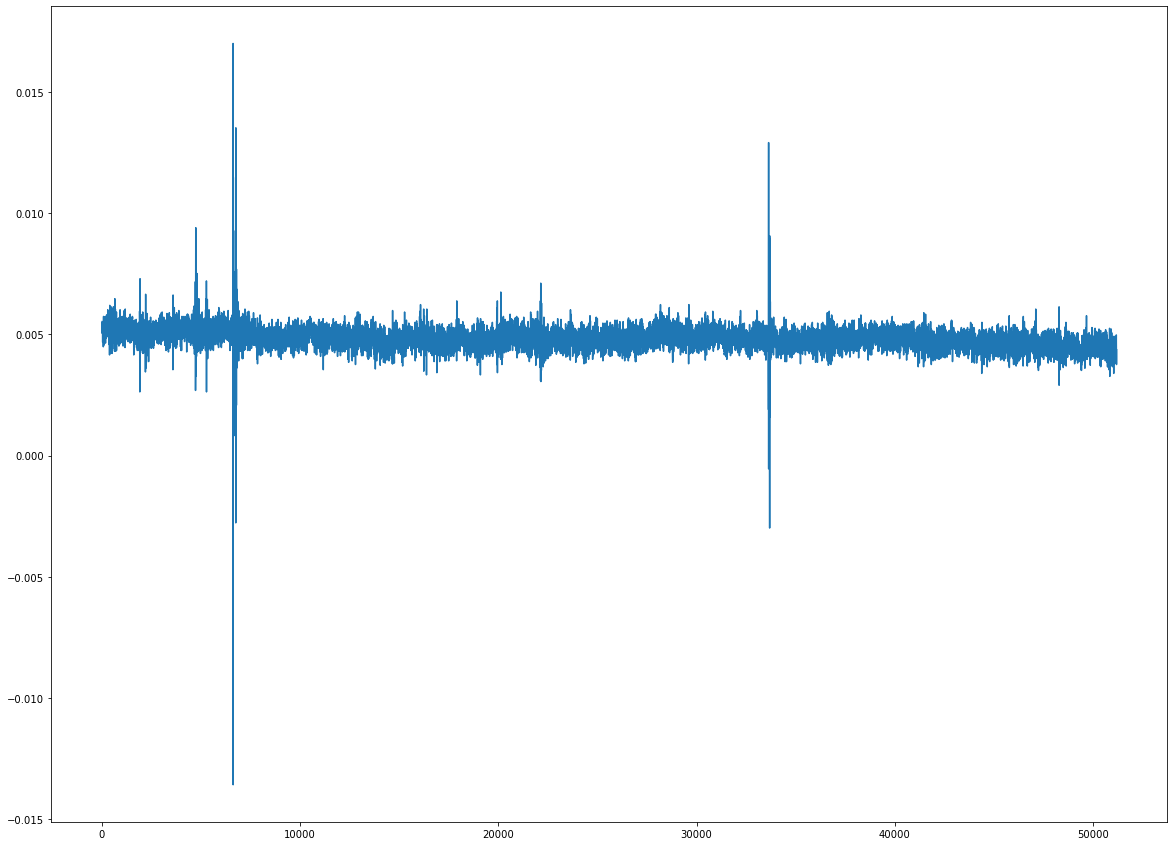

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,15))
plt.plot(sig)
plt.show()

The signal can be ploted as a spectrogram (time frequency representation).
This representation shown frequency of the signal.

In [ ]:
!pip install matplotlib
!pip install librosa

In [5]:
import librosa as lr
import librosa.display
import numpy as np

In [6]:
tf_sig = lr.stft(sig, n_fft=2048) #n_fft = nombre de fit à prendre pour les fenêtres glissante 
#Pour n_fft=2048, le nombre de composants fréquentiels uniques est donc 2048/2 + 1 = 1025
tf_sig.shape

(1025, 101)

In [21]:
tf_sig = np.abs(tf_sig)
tf_sig

array([[2.67912345e+00, 4.86587120e+00, 5.32621246e+00, ...,
        4.60062195e+00, 4.10251372e+00, 2.21285283e+00],
       [2.17007558e+00, 2.89054905e+00, 2.67829914e+00, ...,
        2.33043302e+00, 2.43141190e+00, 1.78606423e+00],
       [1.14184609e+00, 4.06310733e-01, 1.56696457e-02, ...,
        2.43110074e-02, 2.90000296e-01, 9.25618215e-01],
       ...,
       [2.73283262e-03, 1.44856061e-03, 1.38062822e-04, ...,
        2.76606300e-04, 1.30773835e-03, 2.33208325e-03],
       [2.77221219e-03, 1.35419450e-03, 1.65126377e-04, ...,
        2.41596288e-04, 8.61870868e-04, 2.16337033e-03],
       [2.78957576e-03, 1.50546168e-03, 1.89096143e-04, ...,
        3.08705129e-04, 1.20277061e-03, 2.15046885e-03]])

/tmp/ipykernel_19115/3354046069.py:1: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  lr.display.specshow(lr.amplitude_to_db(tf_sig, ref=np.max))


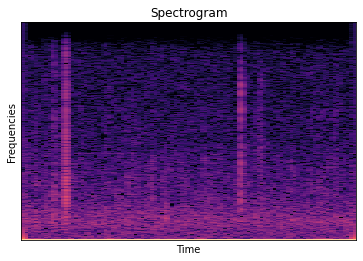

In [14]:
lr.display.specshow(lr.amplitude_to_db(tf_sig, ref=np.max))
plt.title("Spectrogram")
plt.xlabel("Time")
plt.ylabel("Frequencies")
plt.show()

<bound method ScalarMappable.get_array of <matplotlib.collections.QuadMesh object at 0x7fa7da4adc30>>